In [18]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy https://www.scipy.org/
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy https://numpy.org/
import numpy as np
print('numpy: {}'.format(numpy.__version__))
# matplotlib https://matplotlib.org/
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas https://pandas.pydata.org/
import pandas as pd 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn https://scikit-learn.org/stable/
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [29]:
# Load libraries
from mpl_toolkits.mplot3d import Axes3D
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import itertools

In [30]:
# Load dataset
url = r"C:\Users\zakar_mj5ssiw\Downloads\archive\audit_data.csv"

dataset = read_csv(url)


In [31]:
#Shape : Dimensions de l'ensemble de données
print(dataset.shape)
# Head
print(dataset.head(dataset.size))
# descriptions
print('description de la base')
print(dataset.describe())
# class distribution
print('Répartition des classes')
print(dataset.groupby('Risk').size())

(776, 27)
     Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
0            3.89          23    4.18      0.6   2.508    2.50      0.2   
1            3.89           6    0.00      0.2   0.000    4.83      0.2   
2            3.89           6    0.51      0.2   0.102    0.23      0.2   
3            3.89           6    0.00      0.2   0.000   10.80      0.6   
4            3.89           6    0.00      0.2   0.000    0.08      0.2   
..            ...         ...     ...      ...     ...     ...      ...   
771         55.57           9    0.49      0.2   0.098    0.40      0.2   
772         55.57          16    0.47      0.2   0.094    0.37      0.2   
773         55.57          14    0.24      0.2   0.048    0.04      0.2   
774         55.57          18    0.20      0.2   0.040    0.00      0.2   
775         55.57          15    0.00      0.2   0.000    0.00      0.2   

     Risk_B  TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  \
0     0.500   6

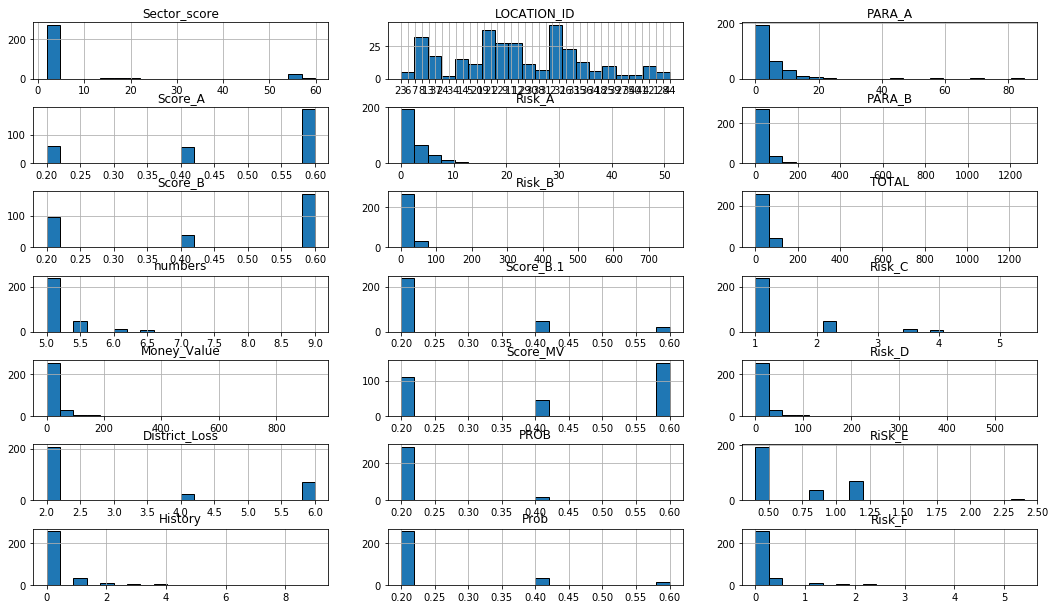

In [32]:
df1=dataset[dataset['Risk']==1]
columns=df1.columns[:21]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [35]:

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    plt.show()


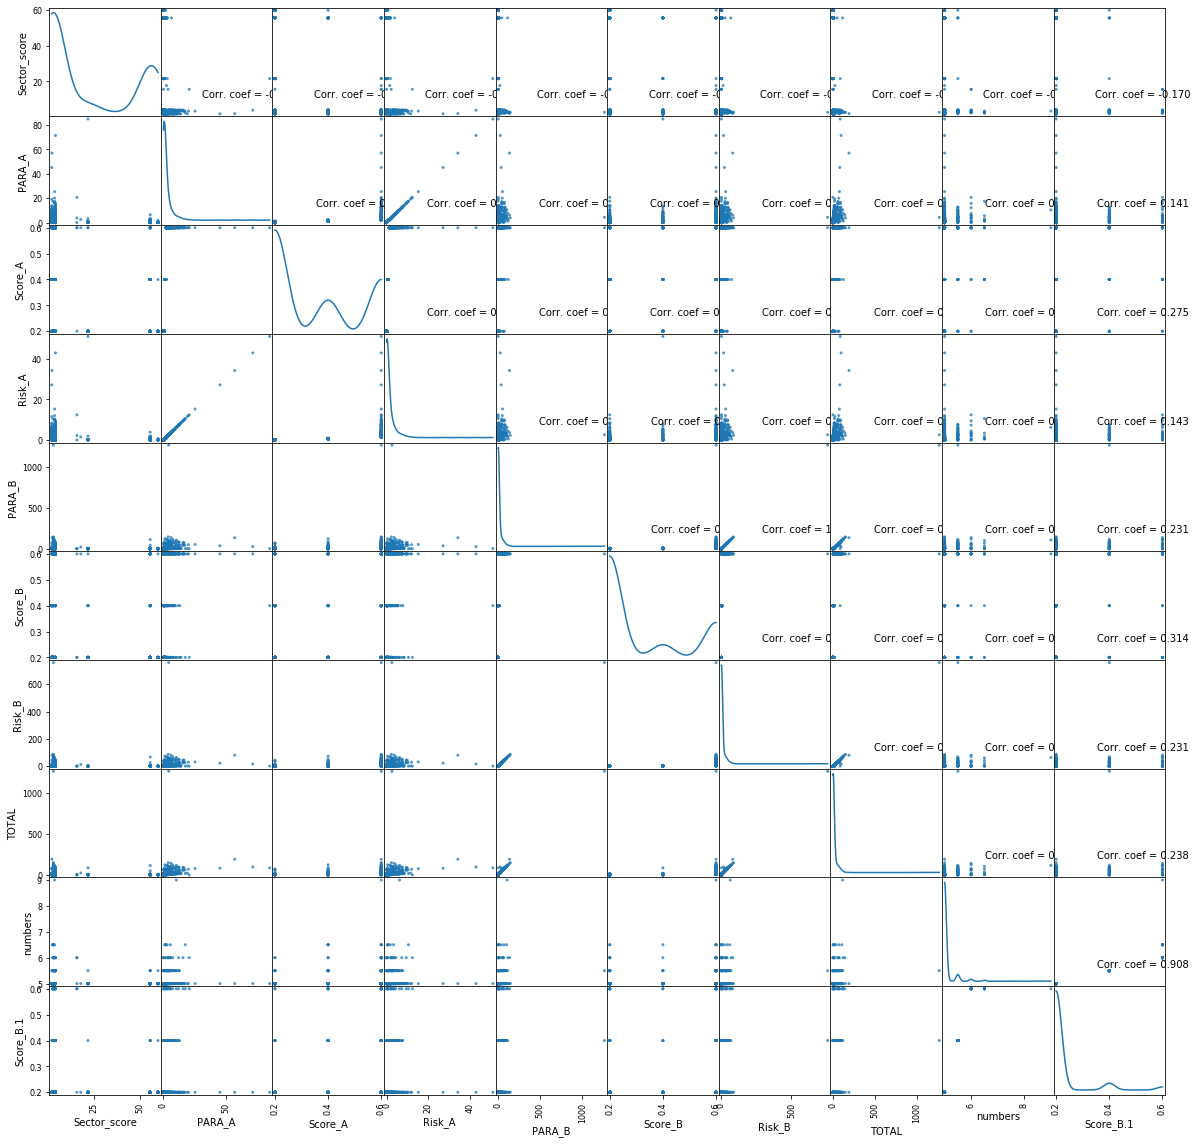

In [36]:
plotScatterMatrix(dataset, 20, 10)